# Finding rotation and translation to match real and desired trajectories

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
def load_trajes(name):
    traj = np.load('traj'+name+'.npy')
    traj_des = np.load('traj_des'+name+'.npy')
    return traj, traj_des

In [3]:
! ls

compare_trajs.ipynb	    traj_desAlexander.npy  traj_desVladimir.npy
iterative_closest_point.py  traj_desAnton.npy	   trajGrisha.npy
__pycache__		    traj_desGrisha.npy	   trajJuan.npy
trajAlexander.npy	    traj_desJuan.npy	   trajSergey.npy
trajAnton.npy		    traj_desSergey.npy	   trajVladimir.npy


### Desired and actual paths

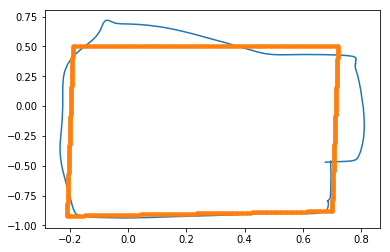

In [4]:
traj1, traj_des1 = load_trajes('Alexander')
plt.plot(traj1[:,0], traj1[:,1])
plt.plot(traj_des1[:,0], traj_des1[:,1], '.')

### Looking for better transformations to match trajectories

In [5]:
from iterative_closest_point import ICP_matching

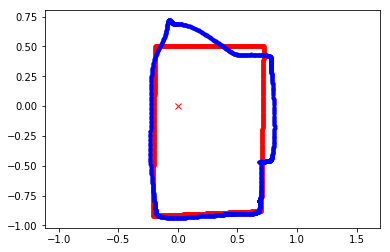

Residual: 1270.4000374427221


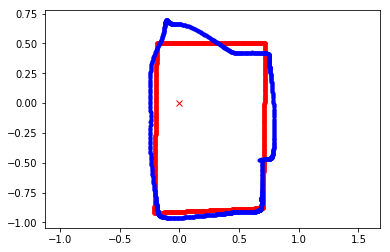

Residual: 1269.1856617625


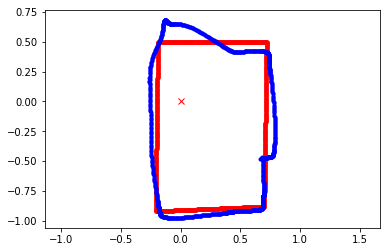

Residual: 1268.374011065143


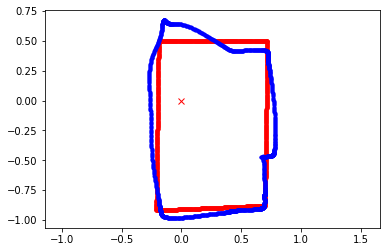

Residual: 1267.7344418003247


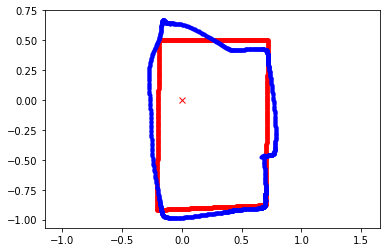

Residual: 1267.2322666318598


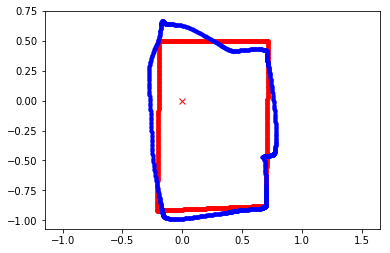

Residual: 1266.8327010806324
Converge 1266.8327010806324 0.399565551227397 6


In [6]:
R, T = ICP_matching(traj_des1.T, traj1.T)

### ICP matching results

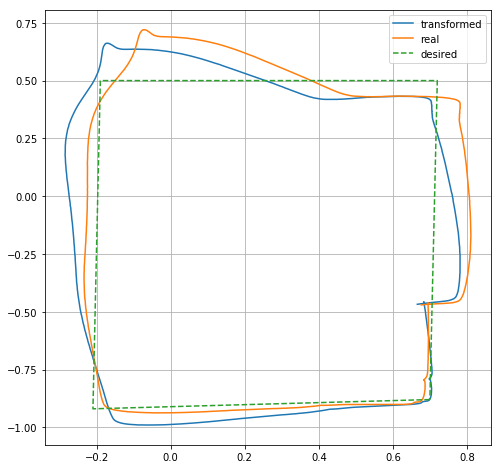

In [8]:
traj_transformed = (R @ traj1.T) + T[:, np.newaxis]
# traj_transformed = (R @ traj1.T)
# traj_transformed = traj1.T + T[:, np.newaxis]

plt.figure(figsize=(8,8))
plt.plot(traj_transformed[0,:], traj_transformed[1,:], label='transformed')
plt.plot(traj1[:,0], traj1[:,1], label='real')
plt.plot(traj_des1[:,0], traj_des1[:,1],'--', label='desired')
plt.grid()
plt.legend()

### MSE of actually executed trajectory

In [9]:
mse_x = ((traj1[:,0] - traj_des1[:,0])**2).mean(axis=0)
mse_y = ((traj1[:,1] + traj_des1[:,1])**2).mean(axis=0)
print('MSE_x %.2f [m]:'%mse_x)
print('MSE_y %.2f [m]:'%mse_y)
print('MSE %.2f [m]:'%((mse_x+mse_y)/2.))

MSE_x 0.13 [m]:
MSE_y 0.59 [m]:
MSE 0.36 [m]:


### MSE after trajectory transoramation given by ICP algorithm

In [11]:
mse_x = ((traj_transformed.T[:,0] - traj_des1[:,0])**2).mean(axis=0)
mse_y = ((traj_transformed.T[:,1] + traj_des1[:,1])**2).mean(axis=0)
print('MSE_x %.2f [m]:'%mse_x)
print('MSE_y %.2f [m]:'%mse_y)
print('MSE %.2f [m]:'%((mse_x+mse_y)/2.))

MSE_x 0.10 [m]:
MSE_y 0.58 [m]:
MSE 0.34 [m]:


### Amount of rotation and translation needed to fit trajectories better

In [14]:
dR = np.linalg.norm(R) - 1 # 1 = np.linalg.norm(eye)
dT = np.linalg.norm(T)

print('Translation metric: %.2f [m]'%dT)
print('Rotation metric: %.2f'%dR)

Translation metric: 0.07 [m]
Rotation metric: 0.41
